<a href="https://colab.research.google.com/github/galihww/PHI-Classification/blob/master/Text_Classification_Using_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Catatan Penting

1. Dataset yang digunakan pada kasus ini sebelumnya, telah melewati tahap preprocessing tahap pertama (lihat pada folder "Preprocessing Dataset"), dengan detail preprocessing tahap pertama sebagai berikut:

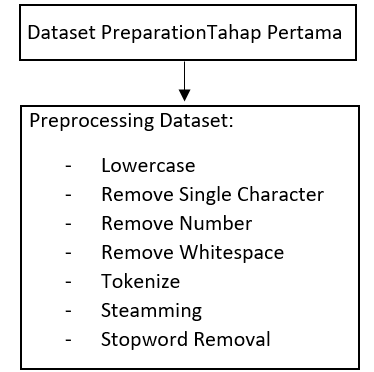

2. Kemudian pada studi kasus ini ditambahkan preprocessing tambahan berupa Padding dan Embedding menggunakan Pre-trained Wikipedia Indonesia.
3. sehingga, preprocessing keseluruhan pada kasus ini jika digambarkan secara menyeluruh sebagai berikut:

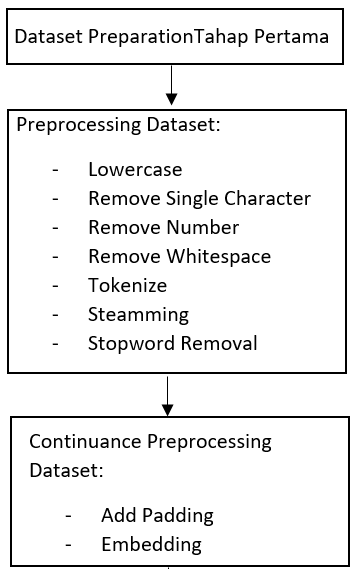

# 1. Tahap Pertama: Read Dataset After Preprocessing

1. Mengkoneksikan antara Google Drive dengan Google Colabolatory

---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

2. Import Library yang dibutuhkan

---






In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


3. Read Dataset menggunakan Pandas
---



In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/Preprocessing Dataset/final_dataset.csv')

4. Melihat 5 data teratas dengan menggunakan fungsi head()

---



In [ ]:
df.head()

# 2. Tahap Kedua: Preprocessing ke-2 Dataset

## 2.1 Splitting Dataset

1. Import Library yang dibutuhkan dalam preprocessing dataset

---



In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import warnings
warnings.filterwarnings("ignore")

2. mendefinisikan data dan label. dimana variabel "x" adalah data, sedangkan variabel "label" adalah label dataset

---



In [ ]:
x = df['Perkara-Final']
label = df['Label']

3. Melakukan splitting dataset menjadi dataset training dan validasi, dengan rasio dataset validasi sebesar 20%, dan dataset training sebesar 80%

---



In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(x, label, test_size=0.2, stratify=label, random_state=42)

4. Pengecekan jumlah dataset training dimana yang dilihat adalah jumlah labelnya dengan jumlah label 1 yaitu 180, dan label 0 yaitu 180. atau dengan kata lain dapat dikatakan dataset ini termasuk ke balance atau seimbang

---



In [ ]:
train_labels.value_counts()

1    180
0    180
Name: Label, dtype: int64

## 2.2 Proses Tokenizing

**Proses Tokenizing dimana akan dilakukan pemecahan kalimat menjadi kata atau yang disebut sebagai "token"**

**example: **

Text:
"budi sedang membeli sayur di pasar"

Tokenizing:
['budi', 'sedang', 'membeli', 'sayur', 'di', 'pasar']

---



1. Tahap pertama yaitu pendefinisian Hyperparameter yang akan digunakan dalam proses Tokonizing, dan proses Padding pada tahap selanjutnya. Hyperparameter itu diantaranya:


*   Max Words : merupakan jumlah maksimal kata unik (kata yang berbeda) yang akan digunakan. (jumlah ini nantinya akan menjadi jumlah baris pada vector embedding)
*   Max Len : merupakan jumlah kata dari headline yang akan diambil. (example: jika dalam satu dokumen terdapat 1100 kata dan pada max_len didefinisikan 1000 maka yang akan diambil hanya 1000 kata saja).
*   OOV Token : merupakan simbol/kata yang akan digunakan ketika terdapat kata dalam dokumen yang tidak ada didalam dictionary. maka kata yang tidak ada tersebut akan dirumah menjadi "oov". hal ini bertujuan untuk menghandle dan melihat kata-kata yang tidak tersedia.
*   Padding Type : merupakan tipe pemberian padding untuk menyamakan panjang dataset pada setiap dokumen. pada kasus ini menggunakan tipe post yang memiliki arti akan menambahkan angka 0 di akhir dokumen sehingga panjangnya akan sesuai dengan "Max Len" dalam hal ini yaitu panjang maksimal kata pada document (lihat poin paling atas)
*   Trunc Type : merupakan tipe pemotongan akhir dokumen agar sesuai dengan panjang yang telah ditentukan. dimana pada kasus ini menggunakan type "post" yang akan memotong kata pada akhir document.
*   Embed Size : merupakan jumlah vector kata. dimana pada kasus ini menggunakan jumlah vector yaitu 50 jumlah ini sesuai dengan julah vector pada "Embedding with Glove Wikipedia Indonesia"



---



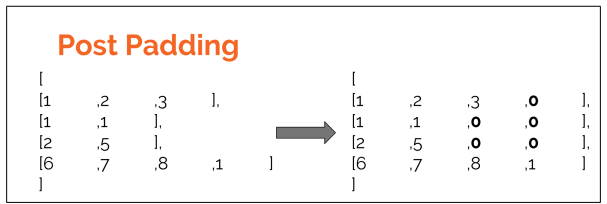

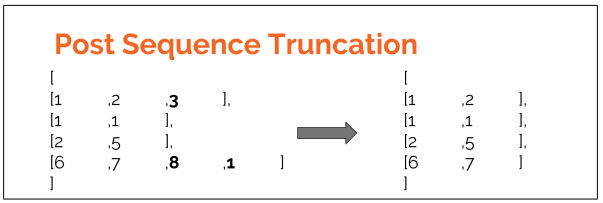

In [ ]:
#Defining Hyperparameters to be used

max_words = 100000     # how many unique words to use (i.e num rows in embedding vector)
max_len = 1000       # max number of words in a headline to use
oov_token = '00V'    # for the words which are not in training samples
padding_type = 'post'   # padding type
trunc_type = 'post'    # truncation for headlines longer than max length
embed_size = 50    # how big is each word vector

2. Proses Tekenizing dengan menggunakan Library Tokenizer yang telah diimport sebelumnya.

---



In [ ]:
tokenizer = Tokenizer(num_words=max_words, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

## 2.2 Padding

**Proses Padding merupakan proses untuk membuat setiap kalimat di document menjadi memiliki panjang yang "Seragam" atau "Sama". **

1. Proses padding dijalankan dengan memanggil fungsi pad_sequences dari tensorflow yang sudah diimport diatas. pada proses ini menggunakan hyper patameter yang sudah dijelaskan diatas.
---




In [ ]:
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)


2. Melihat hasil padding pada dataset validasi dan dataset training
---



In [ ]:
print("train_sequences\n", train_sequences)
print("\n\ntest_sequences\n", test_sequences)

train_sequences
 [[ 32   5  16 ...  29  12 237]
 [ 32   5  16 ...   6 555  20]
 [ 32   2  16 ... 277   2   2]
 ...
 [ 32   2  16 ...   3 158 100]
 [ 32   2  16 ...   0   0   0]
 [ 32   2  16 ... 577  23 184]]


test_sequences
 [[  32    5   16 ...   13   28   28]
 [  32    2   16 ...  123    2   44]
 [  32    5   16 ...   16  950 1297]
 ...
 [  32    5   16 ...   83  170  104]
 [  32    5   16 ...   56 5482  373]
 [  32    2   16 ...    4    4   53]]


# 3. Tahap Ketiga: Build Models

## 3.1 Embedding With Glove Wikipedia Indonesia

1. Proses Embedding merupakan proses konversi sebuah text menjadi vector angka.
pada proses ini menggunakan embedding yang berasal dari Wikipedia indonesia yang memiliki dimensi vector sebesar 50. kenapa menggunakan wikipedia Indonesia? karena text yang diolah menggunakan bahasa indonesia sehingga untuk memaksimalkan maka menggunakan informasi-informasi yang tersedia pada wikipedia indonesia untuk melakukan vectorize/embedding kata-kata.


Note: Pretrained Glove Wikipedia Indonesia diambil dari : https://yudiwbs.wordpress.com/2018/04/02/glove-untuk-wikipedia-bahasa-indonesia/


---



In [ ]:
embedding_path = '/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/asset/trial and error/deep learning/glove_50dim_wiki.id.case.text.txt'

embeddings_index = {}
f = open(embedding_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

word_index = tokenizer.word_index

all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()

embedding_matrix = np.random.normal(emb_mean, emb_std, (len(word_index) + 1, embed_size))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

2. Tahap Kedua adalah penyusunan arsitektur model. dengan rincian sebagai berikut :


*   1. Embedding Layer
*   2. Bidirectional LSTM Layer Pertama dengan jumlah neuron yaitu 64
*   3. Bidirectional LSTM Layer Kedua dengan jumlah neuron yaitu 32
*   4. Dense Layer dengan jumlah neuron sebesar 256, dengan fungsi activation yaitu 'relu'
*   5. Dropout Layer dengan jumlah 0.6 atau 60%. dimana penggunaan dropout layer ini akan memutus jaringan neuron sebesar 60% sehingga model tidak bekerja terlalu rigit, selain itu teknik ini bermanfaat untuk menghindari terjadinya overfitting.
*   6. Dense Layer dengan jumlah neuron yaitu sebesar 128, dengan fungsi activation yaitu "relu"
*   7. Penambahan Dropout Layer kedua sebesar 0.5 atau 50%, yang akan memutuskan hubungan neuron pada layer sebesar 50%. sama seperti penjelasan sebelumnya bahwa penggunaan teknik ini berguna untuk menghindari terjadinya overfitting.
*   8. Penambahan Dense Layer ketiga dengan jumlah neuron yaitu sebesar 32 dengan fungsi activation "relu"
*   9. Penambahan Dropout Layer ketiga yaitu sebesar 0.5 atau sebesar 50%. dimana teknik ini akan memutus hubungan neuron pada Dense Layer sebesar 50%. sama seperti penjelasan sebelumnya bahwa penggunaan teknik ini berguna untuk menghindari terjadinya overfitting.
*   10. Layer terakhir yaitu output layer dengan jumlah output yaitu 1. karena dalam kasus ini yaitu klasifikasi biner atau klasifikasi 2 kelas.


---



In [ ]:
model = tf.keras.Sequential([
    #encoder,
    tf.keras.layers.Embedding(len(word_index) + 1, embed_size, weights=[embedding_matrix]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


3. Tahap Ketiga yaitu proses compile model. dengan menggunakan beberapa paramter diantaranya:


*   1. menggunakan fungsi loss yaitu "Binary Cross Entropy", karena merupakan kasus klasifikasi biner atau klasifikasi  2 kelas maka ini merupakan fungsi loss yang cocok.
*   2. Optimizer menggunakan Adam, karena memiliki tingkat konvergersi yang cepat. sehingga pelatihan cenderung lebih cepat dibandingkan dengan optimizer lainnya.
*   3. Pendefinisian learning rate yaitu sebesar 1 X 10 pangkat -4 atau 0.0001. learning rate akan menentukan tingkat kecepatan pelatihan. dimana jika learning rate terlalu besar maka kecepatan pelatihan akan lebih cepat namun, akan menyebabkan tingkat loss yang tinggi karena tidak tercapaian solusi yang optimal. oleh karenanya learning rate pada kasus ini diset 0.0001.



---



In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

4. Tahap Keempat melakukan visualisasi terhadap arsitektur proposed method

---



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          1186900   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        58880     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

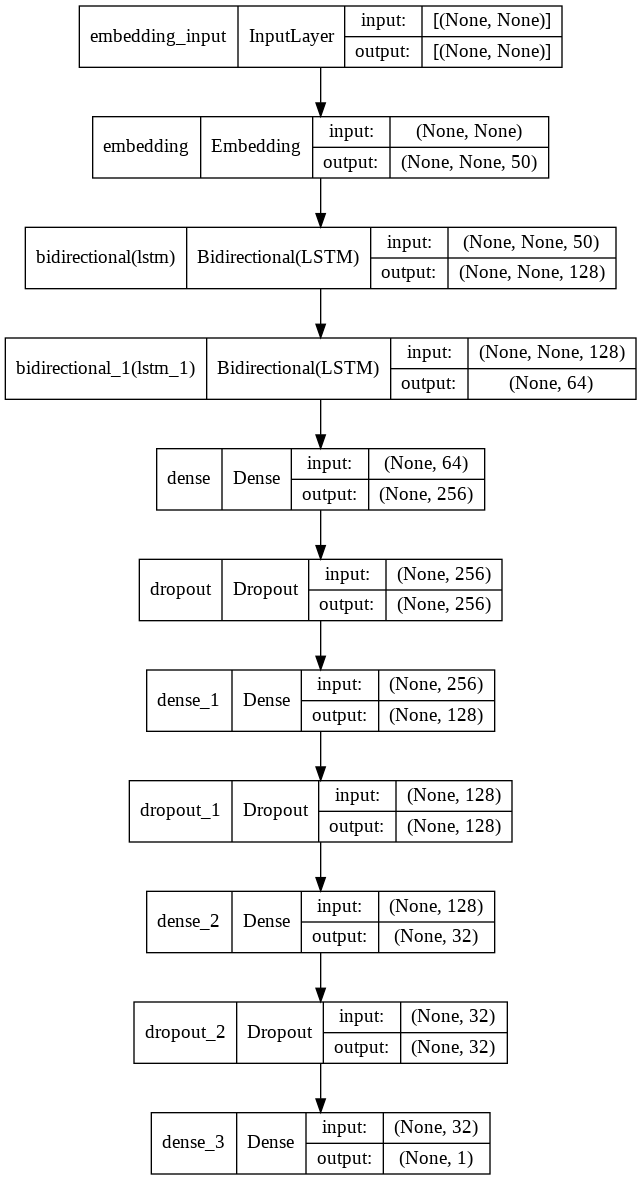

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_RNN-LSTM.png', show_shapes=True, show_layer_names=True)

5. Tahap Ke-lima, merupakan pendefinisian Callback dengan rincian sebagai berikut:


*   1. Menggunakan ModelCheckpoint untuk memonitor kondisi/performa dari model
*   2. Mendefinisikan letak directory untuk nantinya meletakkan hasil model (model.h5) terbaik.
*   3. ModelCheckPoint, nantinya akan melihat performa model berdasarkan value dari parameter monitor, dimana pada kasus ini yaitu "val_loss".
*   4. Cara kerja dari callback pada kasus ini yaitu memonitor performa model menggunakan variabel "val_loss" jika val_loss bernilai jauh lebih kecil dalam hal ini memiliki performa lebih baik, maka model pada epoch tersebut akan otomatis di save ke directory yang sebelumnya telah didefinisikan. hal ini dilakukan jika parameter "save_best_only" bernilai True.



---



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

directory_to_save_best_model_file = '/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/2. Deep Learning/model_1_versi 2.h5' #nama modelnya dalam drive saya ganti menjadi model_1_callback
best_model = ModelCheckpoint(directory_to_save_best_model_file,
                             monitor='val_loss',
                             verbose = 1,
                             save_best_only = True
                             )

6. Tahap keenam yaitu melakukan pelatihan model dengan memanggil fungsi fit(), dengan rincian sebagai berikut:


*   Jumlah epoch atau perulangan pelatihan yaitu sebesar 150
*   Verbose bernilai 2 untuk menunjukkan progress pelatihan
*   Pemanggilan callback yang sebelumnya telah didefiniskan pada tahap 5

Note "Pada proses training untuk melihat waktu eksekusi menggunakan library dari datetime"

---



In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(train_sequences, train_labels, epochs=150, validation_data=(test_sequences, test_labels), verbose=2, callbacks=best_model)

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/150

Epoch 00001: val_loss improved from inf to 0.69459, saving model to /content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/2. Deep Learning/model_1_versi 2.h5
12/12 - 22s - loss: 0.6970 - accuracy: 0.4944 - val_loss: 0.6946 - val_accuracy: 0.5000 - 22s/epoch - 2s/step
Epoch 2/150

Epoch 00002: val_loss improved from 0.69459 to 0.68987, saving model to /content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/2. Deep Learning/model_1_versi 2.h5
12/12 - 8s - loss: 0.6926 - accuracy: 0.5056 - val_loss: 0.6899 - val_accuracy: 0.5000 - 8s/epoch - 657ms/step
Epoch 3/150

Epoch 00003: val_loss improved from 0.68987 to 0.68386, saving model to /content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/2. Deep Learning/model_1_versi 2.h5
12/12 - 8s - loss: 0.6837 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.5000 

7. Tahap ke-Tujuh yaitu Model Evaluation, yaitu melakukan visualisasi loss dan accuracy.

---



3/3 [==============================] - 1s 232ms/step - loss: 4.4737e-06 - accuracy: 1.0000
Test Loss:  4.47366392108961e-06
Test Accuracy 1.0
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


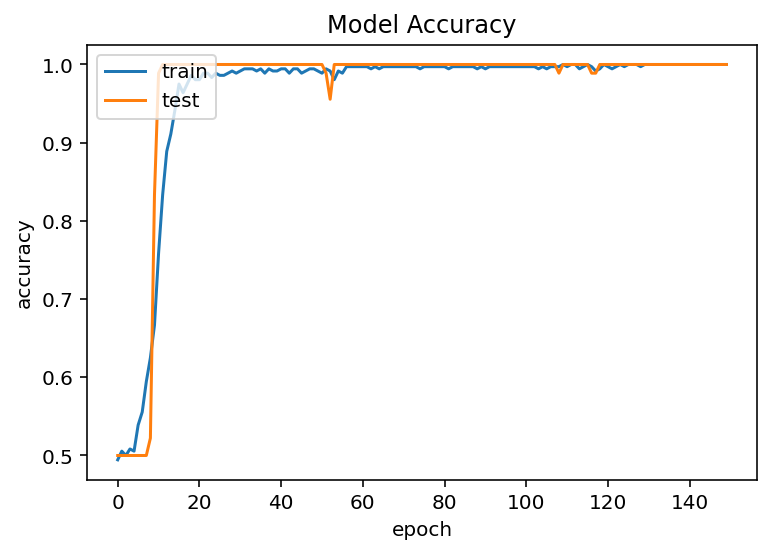

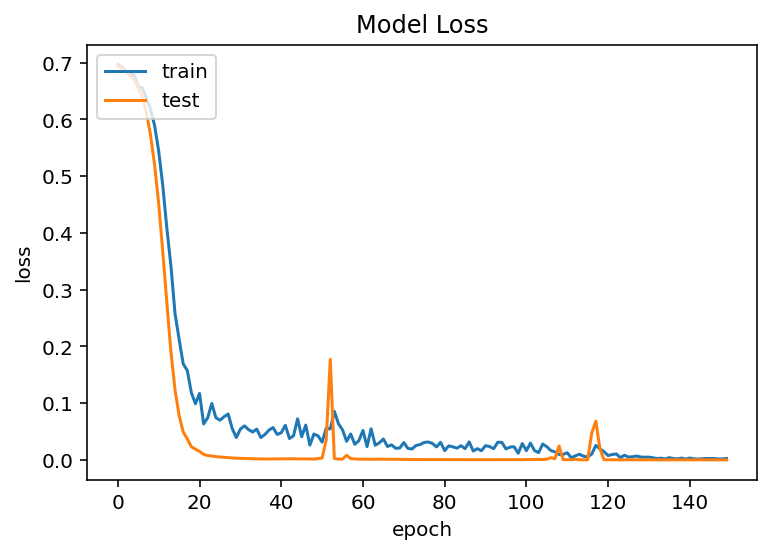

In [ ]:
score = model.evaluate(test_sequences, test_labels)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

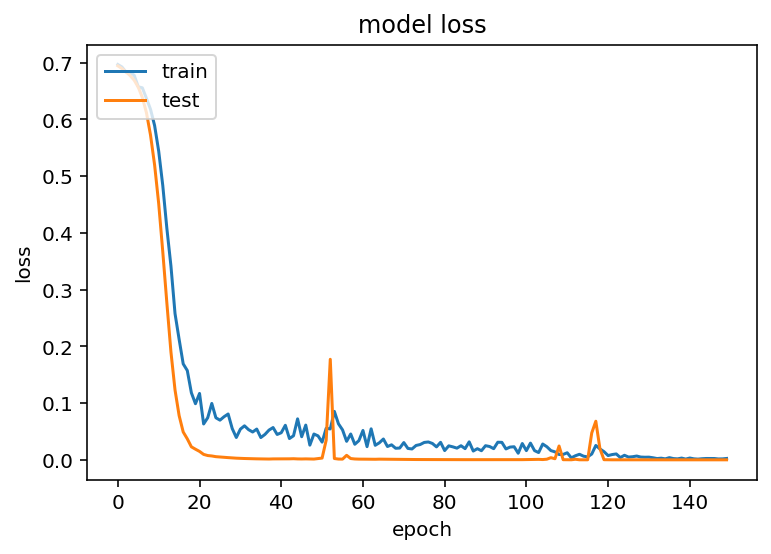

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(False)
plt.show()

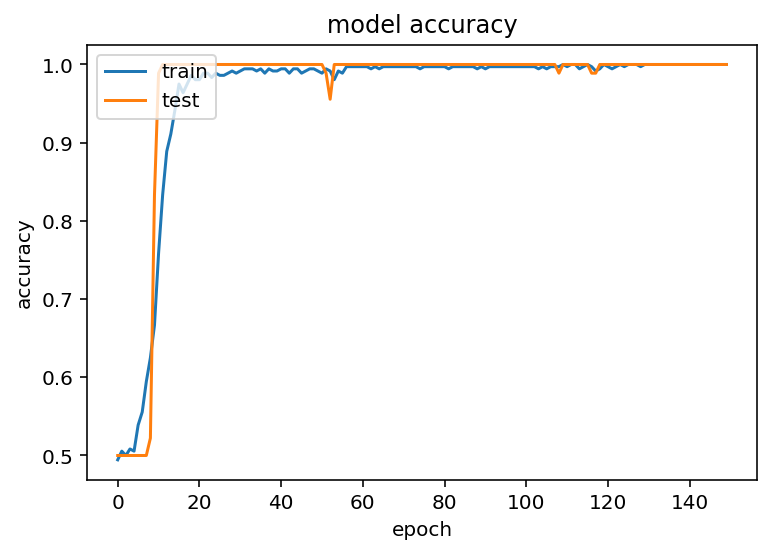

In [ ]:
plt.grid(b=None)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(False)
plt.show()

8. Tahap ke-delapan merupakan Evaluasi Model dengan menggunakan model yang dilatih sebanyak 150 epoch. artinya, yaitu evaluasi model pada epoch ke-150. evaluasi kali ini menggunakan confusion matrix dan classification report

---



In [ ]:
model.save('/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/1. Research Text Summarization/model_1_versi2_training.h5')

In [ ]:
import tensorflow as tf

model_150 = tf.keras.models.load_model('/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/1. Research Text Summarization/model_1_versi2_training.h5')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred=model_150.predict(test_sequences)
arr = np.asarray(test_labels)
pred=np.array([1 if row>=0.5 else 0 for row in pred])
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import seaborn as sns

In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(3,3))
  sns.heatmap(conf_matrix,
              annot=True,
              xticklabels=classes,
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

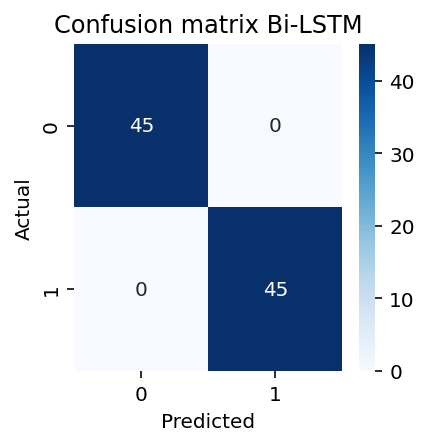

In [ ]:
print_conf(test_labels, pred, [0, 1], title="Confusion matrix Bi-LSTM")

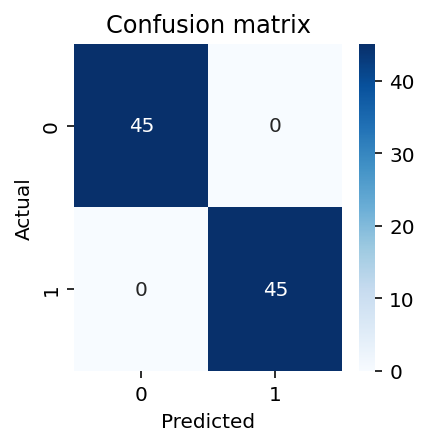

In [ ]:
print_conf(test_labels, pred, [0, 1], title="Confusion matrix")

9. Tahap ke-sembilan, yaitu Evaluasi Model Menggunakan Model yang disave dengan Callback. dimana pada tahap ini evaluasi menggunakan classification report dan juga confusion amtrix.

---



In [ ]:
import tensorflow as tf

model_callback = tf.keras.models.load_model('/content/gdrive/MyDrive/1. Colab Notebooks/modul kecerdasan buatan/0. research text classification/Final Model/2. Deep Learning/model_1_versi 2.h5')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#testing
pred=model_callback.predict(test_sequences)
arr = np.asarray(test_labels)
pred=np.array([1 if row>=0.5 else 0 for row in pred])
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



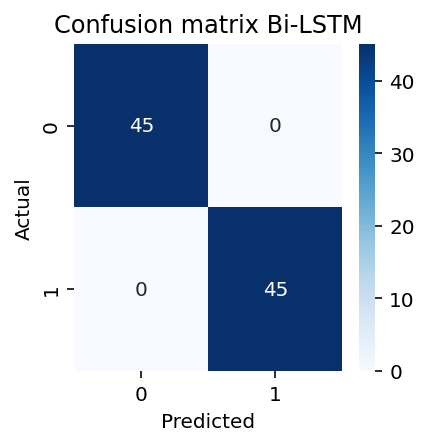

In [ ]:
print_conf(test_labels, pred, [0, 1], title="Confusion matrix Bi-LSTM")

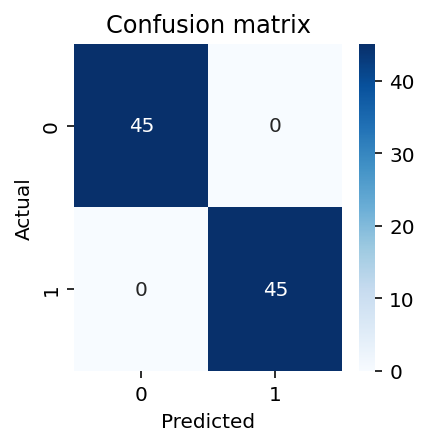

In [ ]:
print_conf(test_labels, pred, [0, 1], title="Confusion matrix")